<a href="https://colab.research.google.com/github/JaneSams/Regression/blob/main/Regression_Project_Manhattan_rent_Organized_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

This project focuses on the relationship between rent and neighborhood and apartment specification (floor, building age, number of rooms, bathroom, etc.).

# **Datasets**

All data is specific to the Manhattan

Link to Dataset: https://www.kaggle.com/code/shaneysze/multiple-linear-regression-to-predict-nyc-rent/data

In [1]:
# Imports relevant modules
%matplotlib inline
import pandas as pd 
import numpy as np 
import datetime
import seaborn as sns
from sklearn import datasets
from yellowbrick.target.feature_correlation import feature_correlation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn.tree import export_graphviz
import sys
from sklearn import preprocessing
from dataclasses import dataclass, field
from scipy.stats import norm, skew
from math import sqrt
import pydot
from sklearn.linear_model import Ridge, Lasso

# Reading the Datasets

In [2]:
manhattan = pd.read_csv("manhattan.csv")
manhattan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [3]:
# Check for missing values
manhattan.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

# Target and Feature Distribution

In [4]:
manhattan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rental_id,3539.0,5332.589997,3311.552136,1.0,2443.5,5128.0,8149.5,11349.0
rent,3539.0,5138.940379,3162.824760,1300.0,3150.0,4000.0,6000.0,20000.0
bedrooms,3539.0,1.351936,0.967595,0.0,1.0,1.0,2.0,5.0
bathrooms,3539.0,1.366770,0.599588,0.0,1.0,1.0,2.0,5.0
size_sqft,3539.0,939.727324,477.949074,250.0,613.0,800.0,1141.0,4800.0
min_to_subway,3539.0,4.970896,5.513589,0.0,2.0,4.0,6.0,43.0
floor,3539.0,11.908307,10.960893,0.0,4.0,8.0,17.0,83.0
building_age_yrs,3539.0,51.994914,39.380433,0.0,15.0,39.0,90.0,180.0
no_fee,3539.0,0.403504,0.490669,0.0,0.0,0.0,1.0,1.0
has_roofdeck,3539.0,0.154846,0.361809,0.0,0.0,0.0,0.0,1.0


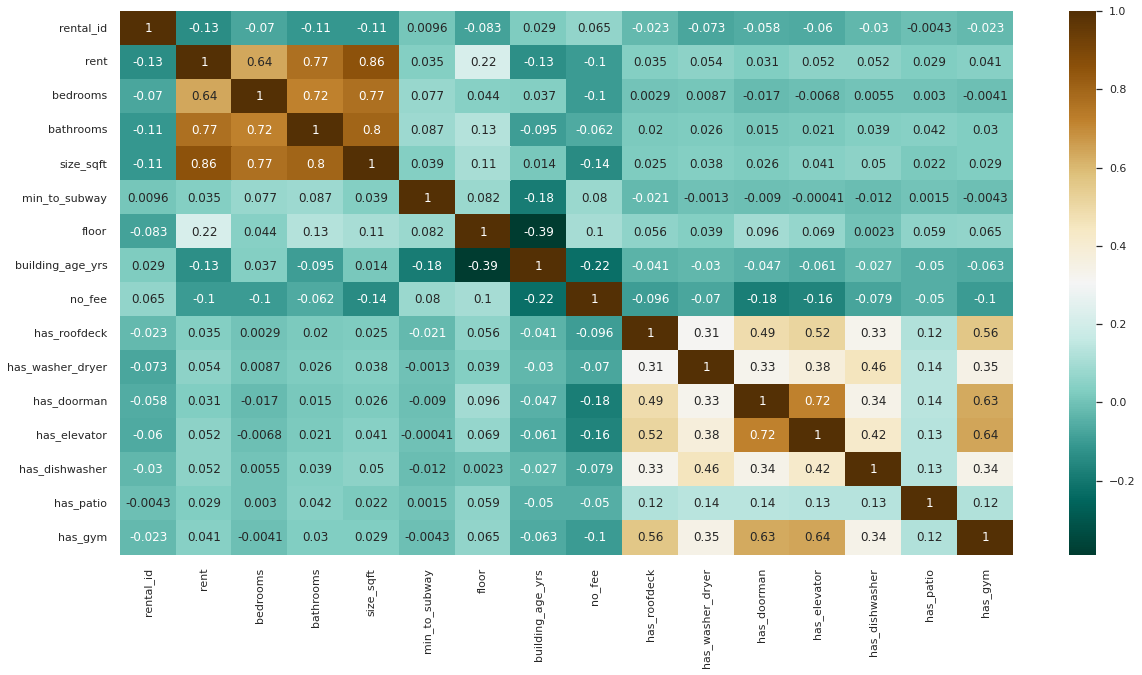

In [5]:
## **Plot Correlations**
corr_matrix=manhattan.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

Visualizations of the distribution of selected columns in a data frame

In [6]:
importnat_columns = manhattan[['bedrooms', 'bathrooms', 'size_sqft', 'floor' ,'rent']]
importnat_columns

,bedrooms,bathrooms,size_sqft,floor,rent
0,0.0,1,480,2.0,2550
1,2.0,2,2000,1.0,11500
2,1.0,1,916,51.0,4500
3,1.0,1,975,8.0,4795
4,2.0,2,4800,4.0,17500
...,...,...,...,...,...
3534,1.0,1,532,8.0,4210
3535,2.0,2,988,10.0,6675
3536,0.0,1,250,5.0,1699
3537,1.0,1,651,5.0,3475


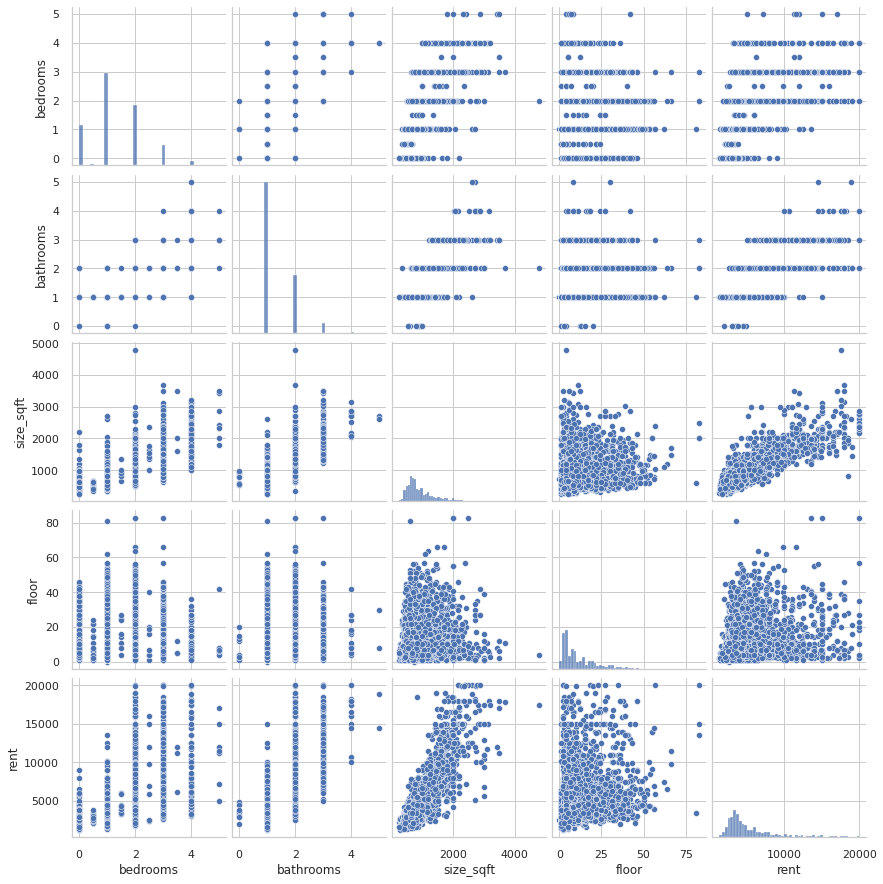

In [7]:
sns.pairplot(importnat_columns)

In [8]:
manhattan_areas = manhattan
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


**Prepocessing the data into groups and then to dummy columns**

In [9]:
areas =  ['Central Park', 'Lower Manhattan', 'Midtwon','Queens','Roosevelt Island','Upper Manhattan','Village']
conditions = [manhattan_areas['neighborhood'].isin(['Central Park South','Upper East Side','Upper West Side']),
             manhattan_areas['neighborhood'].isin(['Battery Park City','Chinatown','Financial District','Little Italy','Tribeca']),
              manhattan_areas['neighborhood'].isin(['Chelsea','Flatiron','Gramercy Park','Lower East Side','Midtown','Midtown East','Midtown South','Midtown West']),
              manhattan_areas['neighborhood'].isin(['Long Island City']),
              manhattan_areas['neighborhood'].isin(['Roosevelt Island']),
              manhattan_areas['neighborhood'].isin(['Central Harlem','East Harlem','Hamilton Heights','Inwood','Manhattanville','Morningside Heights','Washington Heights','West Harlem']),
              manhattan_areas['neighborhood'].isin(['East Village','Greenwich Village','Nolita','Soho','Stuyvesant Town/PCV','West Village'])             
] 
manhattan_areas['Area'] = np.select(conditions,areas)


In [10]:
manhattan_price = manhattan.drop('Area',axis=1)
manhattan_price['group_price'] = np.select(
    [
        manhattan_price['rent'].between(0, 3000, inclusive=False), 
        manhattan_price['rent'].between(3000, 5000, inclusive=True),
        manhattan_price['rent'].between(5001, 7000, inclusive=True),
        manhattan_price['rent'].between(7001, 12000, inclusive=True),
        manhattan_price['rent'].between(12001, 50000, inclusive=True)
    ], 
    [
        'Low', 
        'Medium-Low',
        'Medium',
        'Medium-High',
        'High'
    ], 
    default='Unknown'
)
manhattan_price.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough,group_price
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan,Low
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan,Medium-High
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan,Medium-Low
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan,Medium-Low
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan,High


In [11]:

manhattan_area_groups = manhattan_areas.drop(['rental_id','neighborhood', 'borough'],axis=1, inplace=False)
manhattan_area_groups =  pd.get_dummies(manhattan_area_groups)
manhattan_area_groups.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,has_dishwasher,has_patio,has_gym,Area_Central Park,Area_Lower Manhattan,Area_Midtwon,Area_Queens,Area_Roosevelt Island,Area_Upper Manhattan,Area_Village
0,2550,0.0,1,480,9,2.0,17,1,1,0,...,1,0,1,1,0,0,0,0,0,0
1,11500,2.0,2,2000,4,1.0,96,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4500,1.0,1,916,2,51.0,29,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,...,1,0,1,0,0,0,0,0,0,1


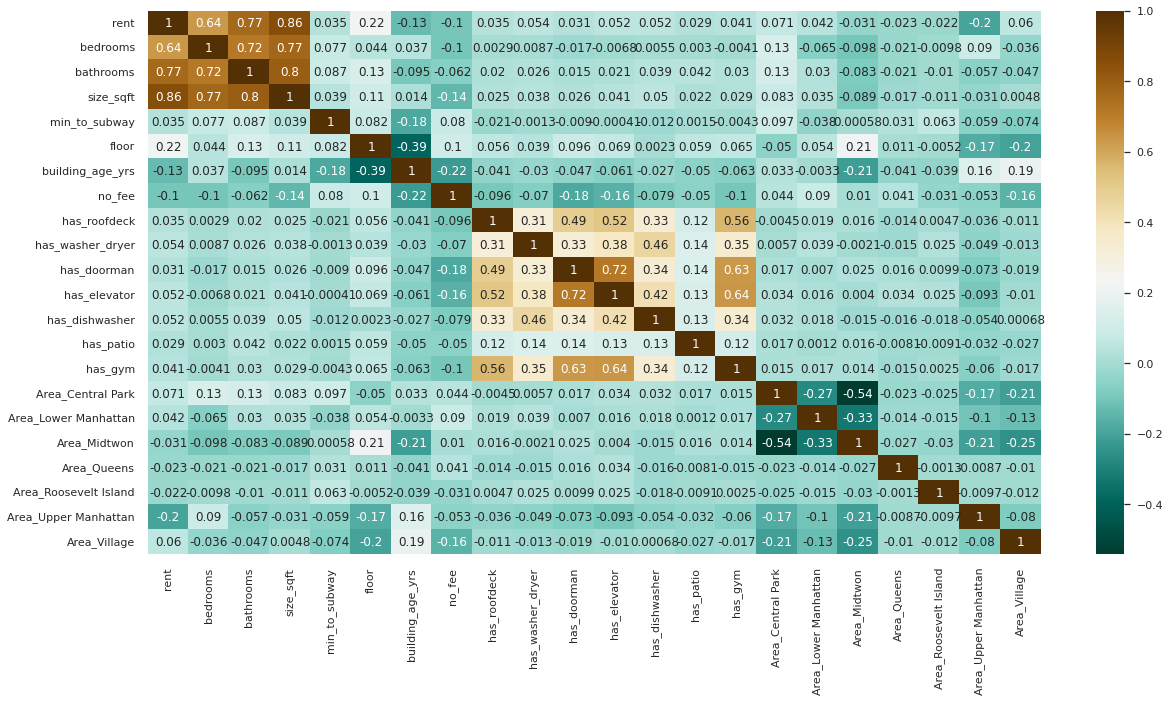

In [12]:
## **Plot Correlations with areas**
corr_matrix=manhattan_area_groups.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

In [13]:
manhattan_prices_groups = manhattan_price.drop(['rental_id','neighborhood', 'borough'],axis=1, inplace=False)
manhattan_prices_groups =  pd.get_dummies(manhattan_prices_groups)
manhattan_prices_groups.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,group_price_High,group_price_Low,group_price_Medium,group_price_Medium-High,group_price_Medium-Low
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,0,1,0,0,0
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,0,0,0,0,1
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,0,0,0,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,1,0,0,0,0


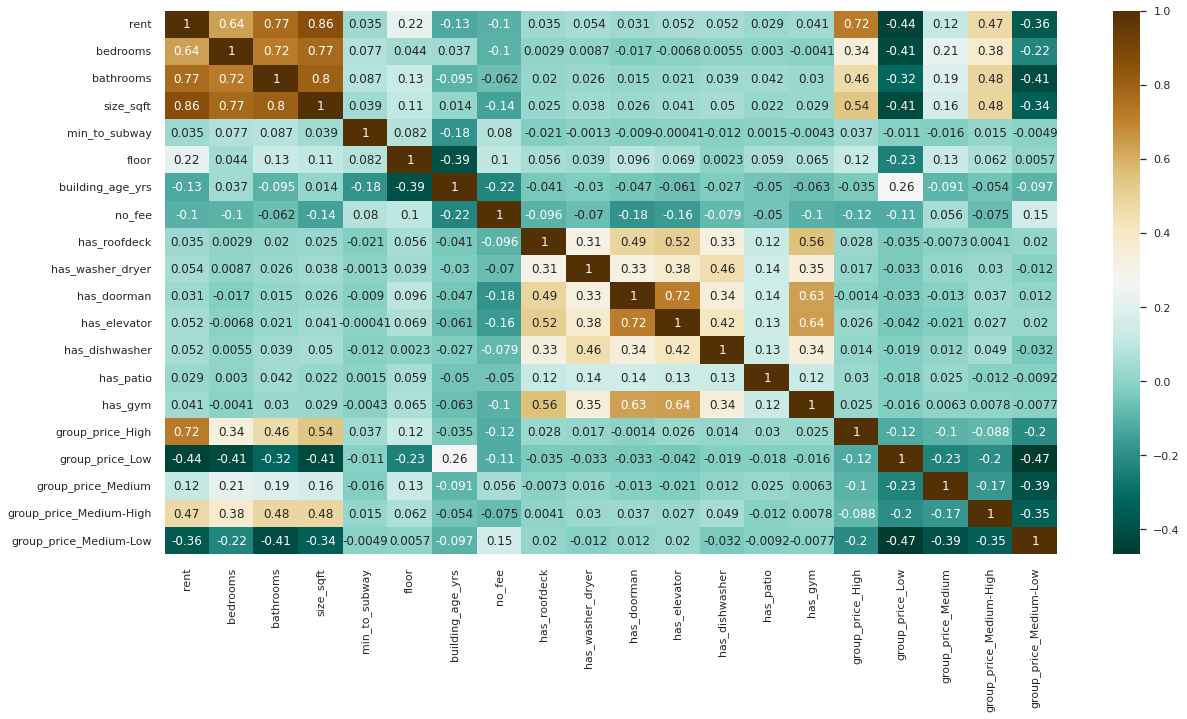

In [14]:
## **Plot Correlations with prices**
corr_matrix=manhattan_prices_groups.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

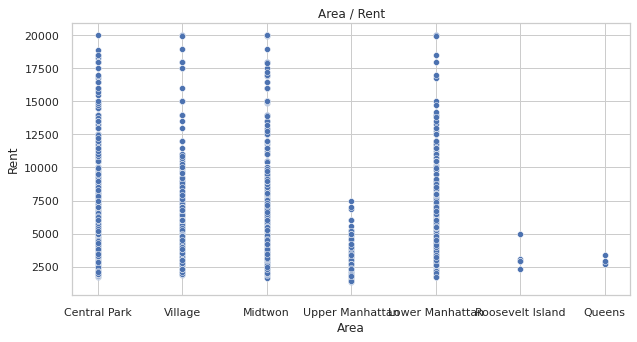

In [15]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(data=manhattan_areas, x='Area',y='rent').set_title('Area / Rent')
plt.xlabel("Area")
plt.ylabel("Rent")
plt.show()

**Prepocessing the data by adding targeting:**
 
The targeting splits to 3 options  - by mean, median or standard deviation. 

In [16]:
manhattan_targeting = manhattan.drop(['rental_id','Area', 'borough'],axis=1, inplace=False)

In [17]:
def target_encoder(df, column, target, index=None, method='mean'):
  index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

  if method == 'mean':
      encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
  elif method == 'median':
      encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
  elif method == 'std':
      encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
  else:
      raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

  return encoded_column
   

In [19]:
labelencoder = preprocessing.LabelEncoder()
manhattan_targeting['neighborhood_encoded'] = labelencoder.fit_transform(manhattan_targeting['neighborhood'])

manhattan_targeting['neighborhood_encoded']=target_encoder(manhattan_targeting,'neighborhood','rent',index=None,method='mean')

In [20]:
rmse_targ = np.sqrt(mean_squared_error(manhattan_targeting['rent'],
                                  manhattan_targeting['neighborhood_encoded']))
rmse_targ
print("RMSE target = {:.4f}".format(rmse_targ))

RMSE target = 2953.0912


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


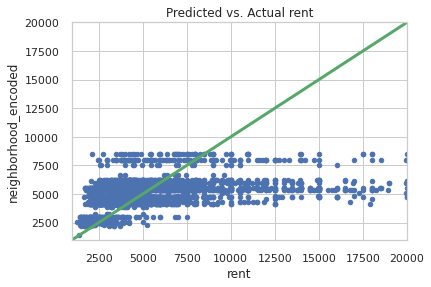

In [21]:
ax = manhattan_targeting.plot('rent', 'neighborhood_encoded', kind='scatter',
                 xlim=[1000, 20000], ylim=[1000, 20000],
                 title='Predicted vs. Actual rent')
ax.plot(np.linspace(1000, 20000, 2), np.linspace(1000, 20000, 2),
        linewidth=3, color='g')
plt.rcParams["figure.figsize"] = [10, 5]

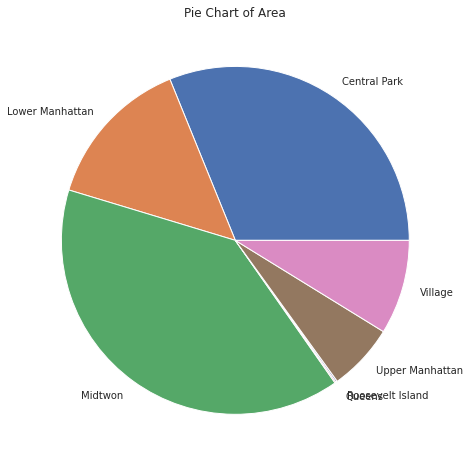

In [22]:
#Visualizing the values in 'Area'
pieplot = manhattan.groupby('Area').size()

pieplot.plot(kind='pie', subplots=True, figsize=(8, 8), fontsize=10)
plt.title("Pie Chart of Area")
plt.ylabel('')
plt.rcParams["figure.figsize"] = [25, 15]

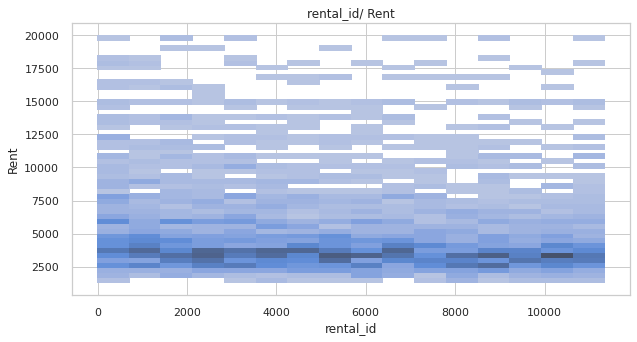

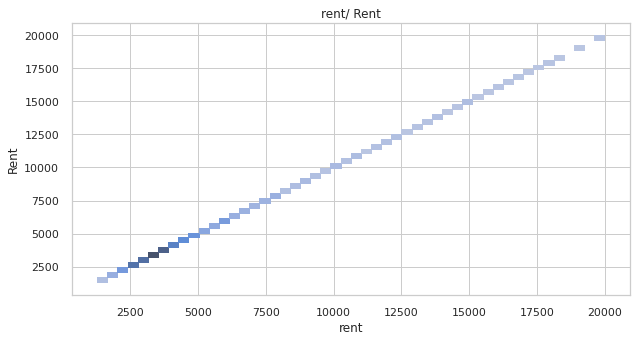

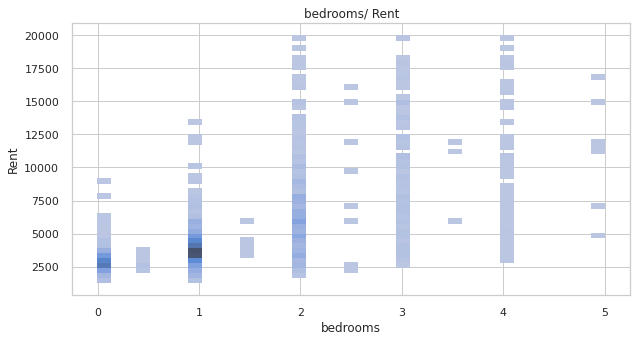

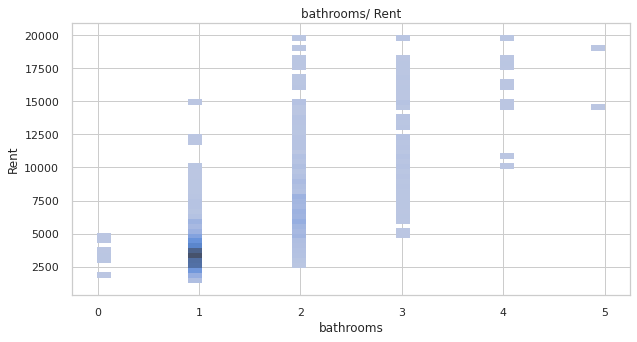

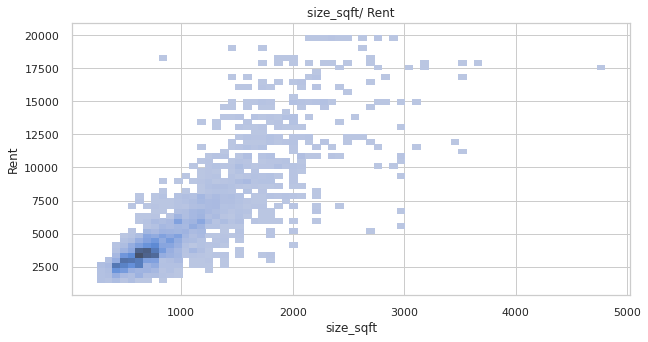

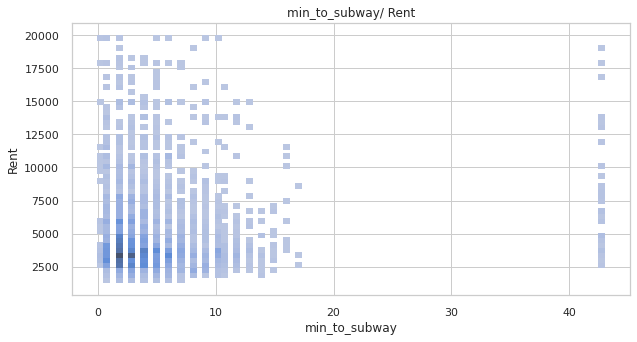

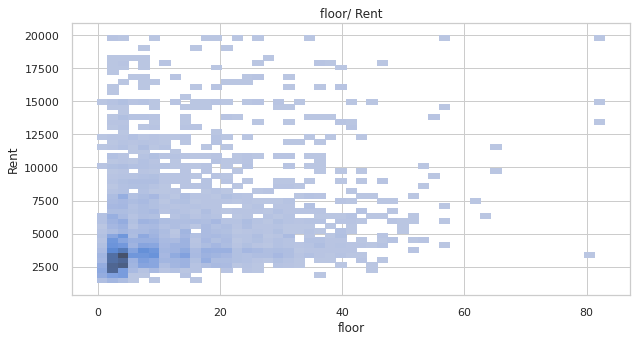

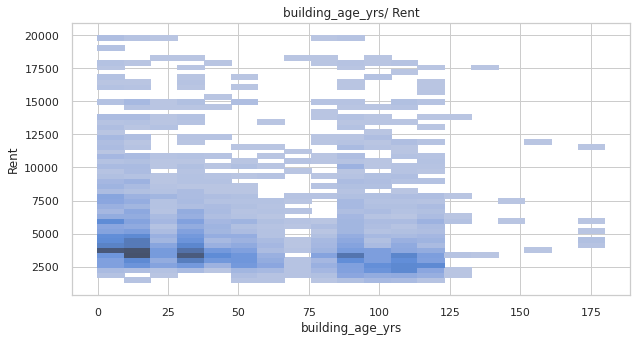

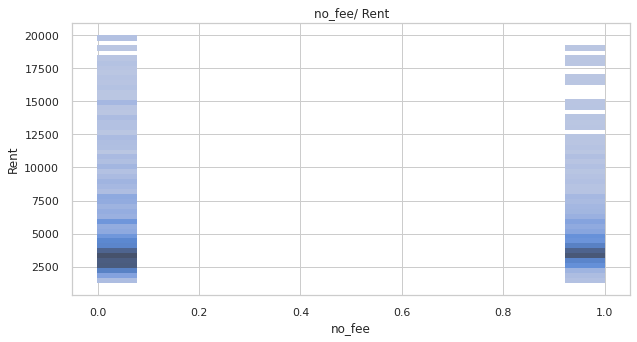

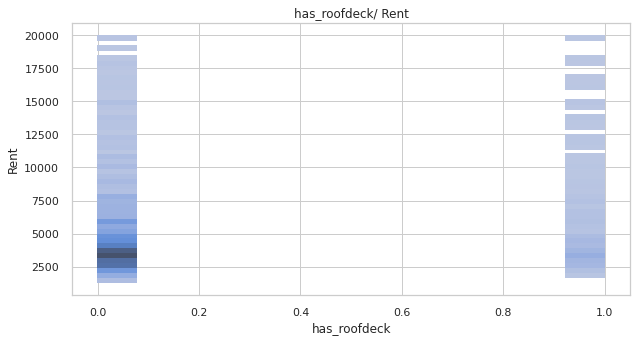

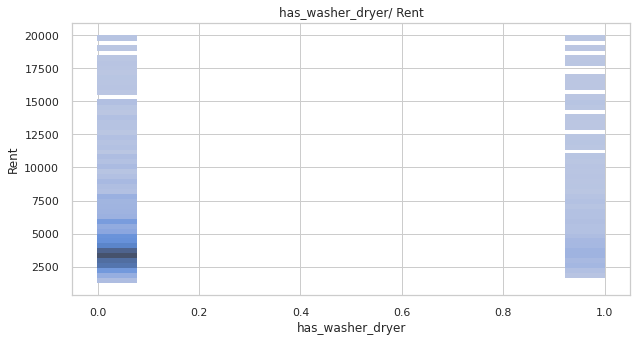

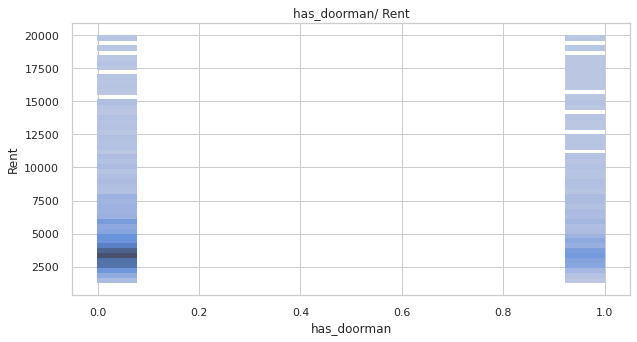

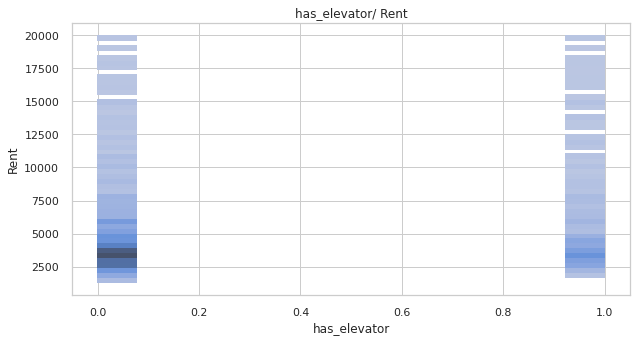

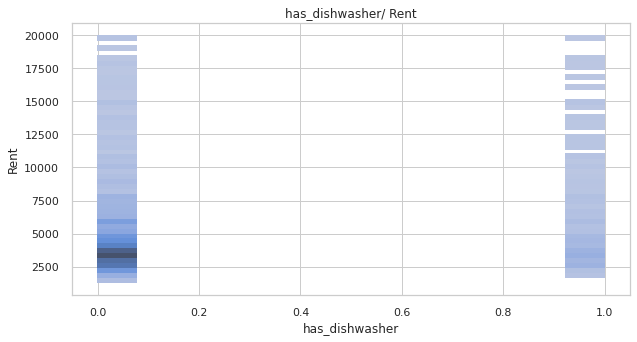

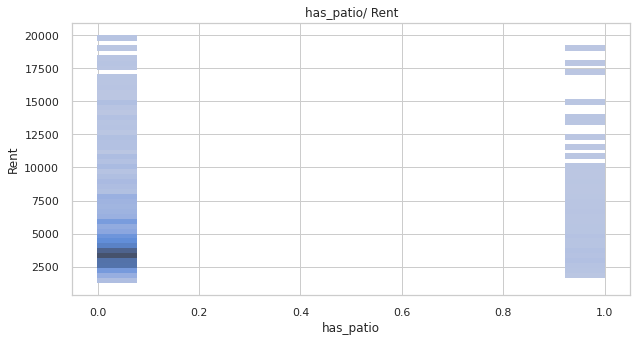

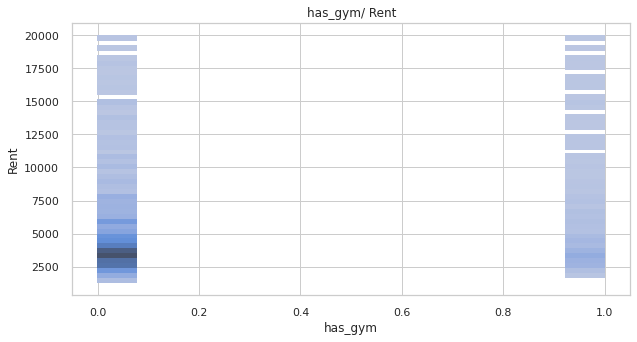

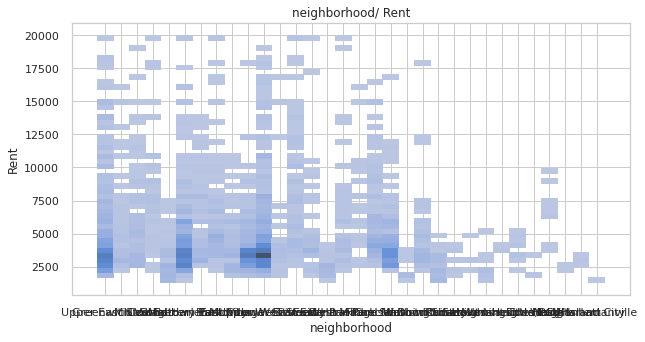

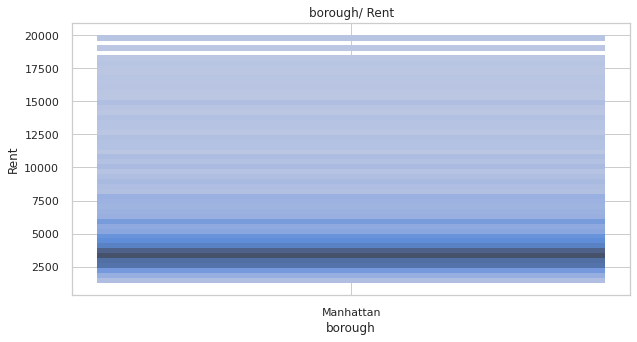

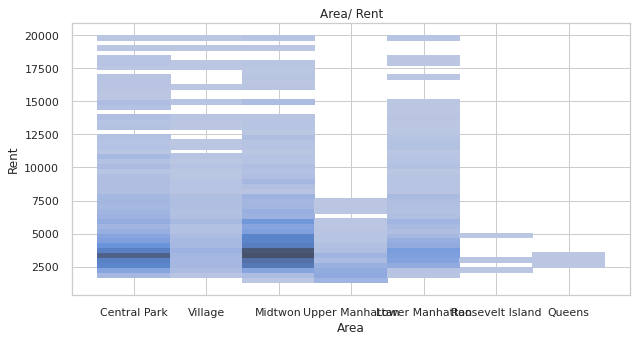

In [23]:
# file.plot(kind = 'hist', x = x, y = y)
for i in manhattan_areas:

  fig,ax = plt.subplots(1,1,figsize=(10,5))
  sns.histplot(data=manhattan_areas, x=i,y='rent', kde=True).set_title(i +'/ Rent')
  plt.xlabel(i)
  plt.ylabel("Rent")
  plt.show()

# **Regressions Model**

Applying models on each manipulation we did on the data 

In [24]:
# Areas grouping
# # 1 label
y_a = manhattan_area_groups[['rent']]

# 5 features plus areas
x_a =manhattan_area_groups[[
  'bedrooms',
  'bathrooms',
  'size_sqft',
  'floor',
  'building_age_yrs',
  'Area_Central Park',
  'Area_Lower Manhattan',
  'Area_Midtwon',
  'Area_Queens',
  'Area_Roosevelt Island',
  'Area_Upper Manhattan',
  'Area_Village'
]]
print(y_a.shape)
print(x_a.shape)


(3539, 1)
(3539, 12)


In [25]:
Xa_train,Xa_test ,Ya_train,Ya_test=  split(x_a,y_a,test_size=0.2,random_state=123456)
model_lin_a = LinearRegression().fit(Xa_train, Ya_train)
model_tree_a =  DecisionTreeRegressor(max_leaf_nodes=10)
model_tree_a.fit(Xa_train, Ya_train)
model_knn_a =  KNeighborsRegressor(n_neighbors=3).fit(Xa_train,Ya_train)

In [26]:
# train test split
manhattan_area_groups_train, manhattan_area_groups_test = split(manhattan_area_groups, train_size=0.8, random_state=12456)

In [27]:
# predict for train and test 
rent_pred_lin_test =  model_lin_a.predict(Xa_test) 
rent_pred_lin =  model_lin_a.predict(Xa_train) 

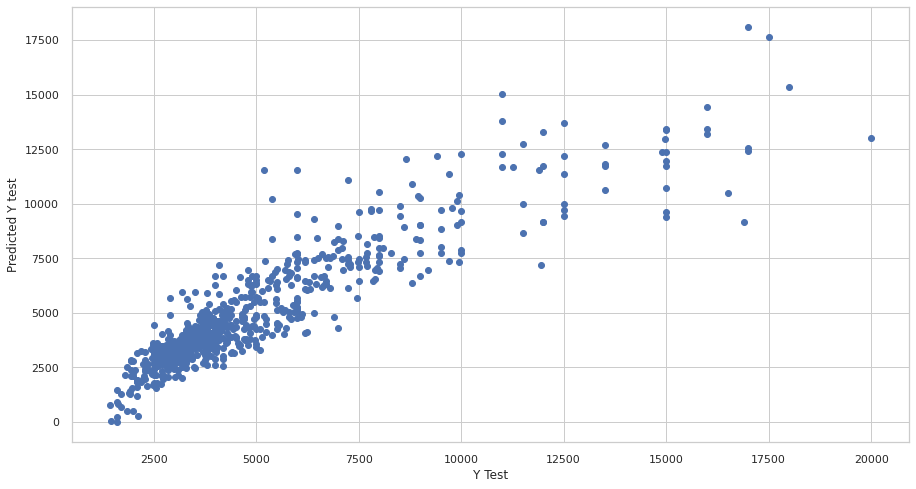

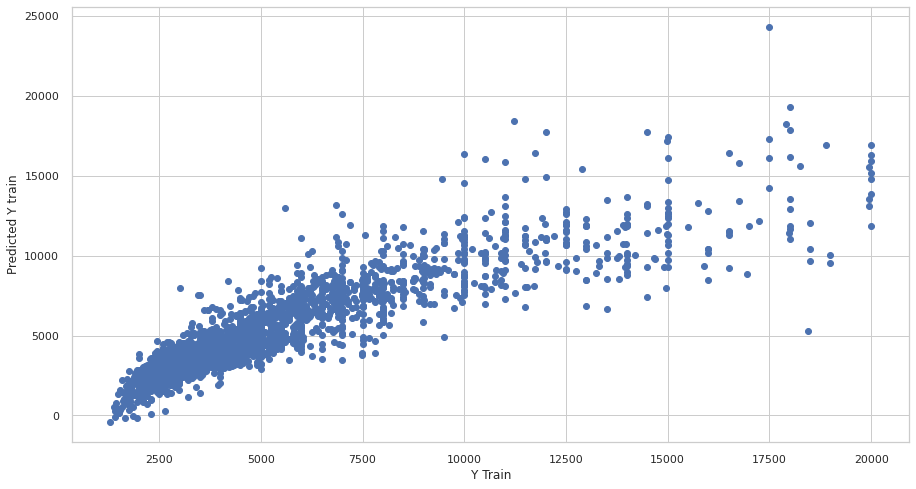

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(Ya_test,rent_pred_lin_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y test')
plt.figure(figsize=(15,8))
plt.scatter(Ya_train,rent_pred_lin)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y train')
plt.show()

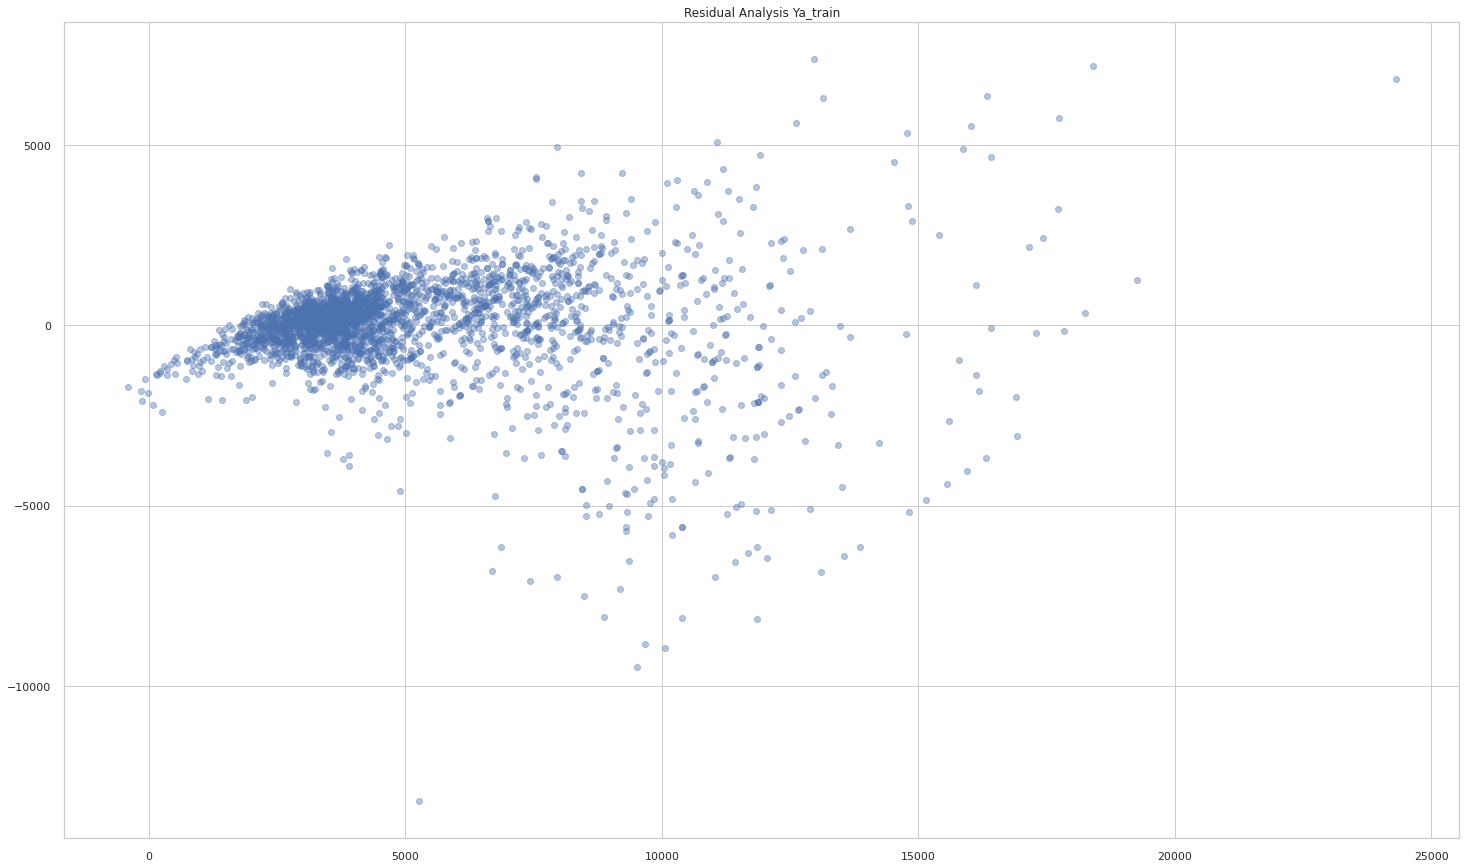

In [29]:
# run a residual analysis to assess the accuracy of our multiple linear regression model
# residuals_test = rent_pred_lin_test - Ya_test

 
# plt.scatter(rent_pred_lin_test, residuals_test, alpha=0.4)
# plt.title('Residual Analysis Ya_test')

residuals_train = rent_pred_lin - Ya_train
 
plt.scatter(rent_pred_lin, residuals_train, alpha=0.4)
plt.title('Residual Analysis Ya_train')
plt.rcParams["figure.figsize"] = [10, 5]
plt.show()



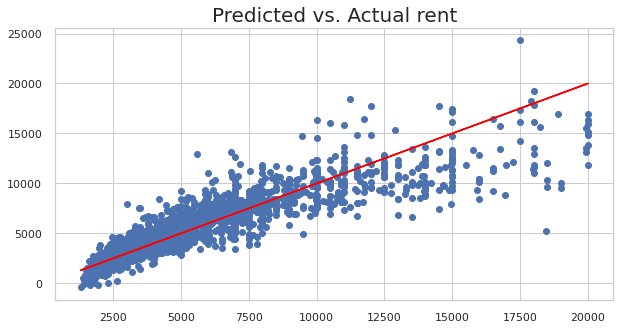

In [30]:
plt.scatter(Ya_train, rent_pred_lin)
plt.plot(Ya_train,Ya_train,  c='red')
plt.title('Predicted vs. Actual rent', size=20)

plt.show()

# Inspect the model

describing the result - intercept_ and coef_.

In [31]:
# print our apartment features
print(x_a.columns)

Index(['bedrooms', 'bathrooms', 'size_sqft', 'floor', 'building_age_yrs',
       'Area_Central Park', 'Area_Lower Manhattan', 'Area_Midtwon',
       'Area_Queens', 'Area_Roosevelt Island', 'Area_Upper Manhattan',
       'Area_Village'],
      dtype='object')


In [32]:
print("The model intercept is: {}".format(model_lin_a.intercept_))
print("The model coefficients are: {}".format(model_lin_a.coef_))

The model intercept is: [-944.54491183]
The model coefficients are: [[ -149.98149633  1106.58186485     4.73811766    21.99698198
     -6.61087726   402.48037944   444.4450735    448.66039678
   -507.64498326  -971.16766893 -1233.16523314  1416.39203561]]


In [33]:
Ya_train['rent_pred_lin'] = model_lin_a.predict(Xa_train)
Ya_train['rent_pred_knn'] = model_knn_a.predict(Xa_train)
Ya_train['rent_pred_tree'] = model_tree_a.predict(Xa_train)
Ya_train.head()

,rent,rent_pred_lin,rent_pred_knn,rent_pred_tree
2172,3425,3891.722039,3773.333333,3852.409048
2219,5700,6619.142472,4100.000000,5737.864000
343,3800,3746.923361,3916.666667,3852.409048
1531,8657,10646.827469,11135.666667,10428.197452
262,3935,3973.035960,4045.000000,3852.409048


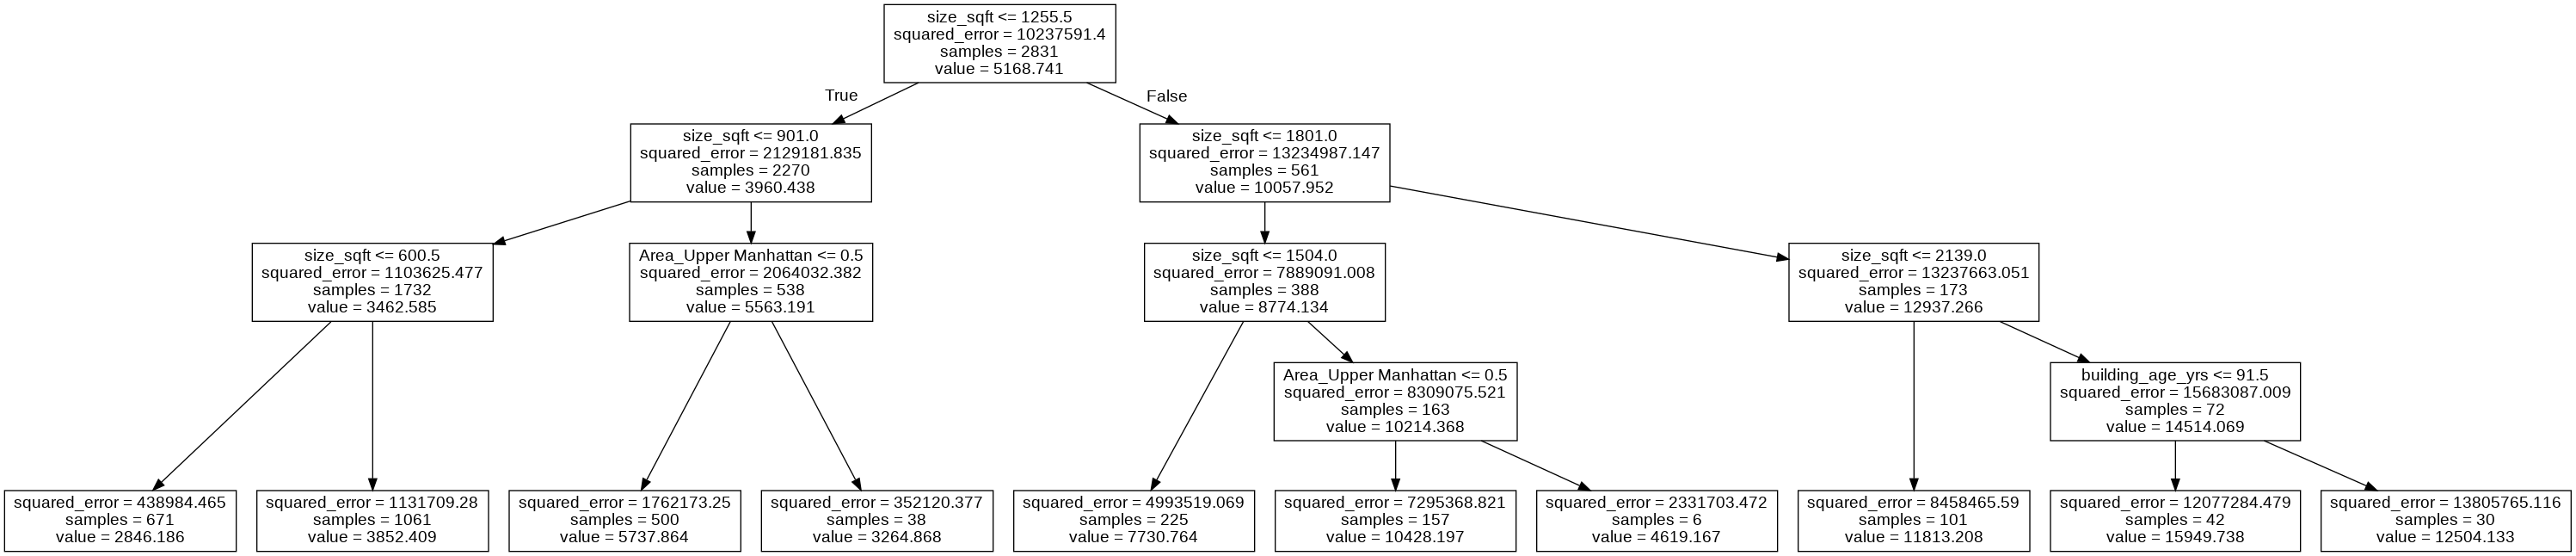

In [34]:
dot_data = export_graphviz(model_tree_a,  feature_names=x_a.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data)[0]  
Image(graph.create_png(), width=2500)

In [35]:
rmse = np.sqrt(mean_squared_error(Ya_train['rent'],
                                  Ya_train['rent_pred_lin']))
print("Linear RMSE = {:.4f}".format(rmse))
rmspe = np.sqrt(np.mean(np.square(((Ya_train['rent'] - Ya_train['rent_pred_lin']) / Ya_train['rent'])*100), axis=0))
print("Linear RMSPE = {:.4f}%".format(rmspe))

Linear RMSE = 1440.1598
Linear RMSPE = 23.6418%


In [36]:
Ya_train['rent_pred_tree'] = model_tree_a.predict(Xa_train)
rmse_tree = np.sqrt(mean_squared_error(Ya_train['rent'],
                                  Ya_train['rent_pred_tree']))
print("Tree RMSE = {:.4f}".format(rmse_tree))
rmspe_tree = np.sqrt(np.mean(np.square(((Ya_train['rent'] - Ya_train['rent_pred_tree']) / Ya_train['rent'])*100), axis=0))
print("Tree RMSPE = {:.4f}%".format(rmspe_tree))

Tree RMSE = 1509.2319
Tree RMSPE = 28.7644%


In [37]:
Ya_train['rent_pred_knn'] = model_knn_a.predict(Xa_train)
rmse_knn = np.sqrt(mean_squared_error(Ya_train['rent'],
                                  Ya_train['rent_pred_knn']))
print("KNN RMSE = {:.4f}".format(rmse_knn))
rmspe_knn = np.sqrt(np.mean(np.square(((Ya_train['rent'] - Ya_train['rent_pred_knn']) / Ya_train['rent'])*100), axis=0))
print("KNN RMSPE = {:.4f}%".format(rmspe_knn))

KNN RMSE = 1136.9769
KNN RMSPE = 20.5241%


# **Grouping by Prices**

In [38]:
y_p = manhattan_prices_groups[['rent']]

# 5 features plus areas
x_p =manhattan_prices_groups[[
  'bedrooms',
  'bathrooms',
  'size_sqft',
  'floor',
  'building_age_yrs',
  'group_price_High',
  'group_price_Low',
  'group_price_Medium',
  'group_price_Medium-Low',
  'group_price_Medium-High'
]]
print(y_p.shape)
print(x_p.shape)

(3539, 1)
(3539, 10)


In [39]:
Xp_train,Xp_test ,Yp_train,Yp_test=  split(x_p,y_p,test_size=0.2,random_state=123456)
model_lin_p = LinearRegression().fit(Xp_train, Yp_train)
model_tree_p =  DecisionTreeRegressor(max_leaf_nodes=20)
model_tree_p.fit(Xp_train, Yp_train)
model_knn_p =  KNeighborsRegressor(n_neighbors=3).fit(Xp_train,Yp_train)

In [40]:
# train test split
manhattan_prices_groups_train, manhattan_prices_groups_test = split(manhattan_prices_groups, train_size=0.8, random_state=12456)

In [41]:
# predict for train and test 
p_rent_pred_lin_test =  model_lin_p.predict(Xp_test) 
p_rent_pred_lin =  model_lin_p.predict(Xp_train) 

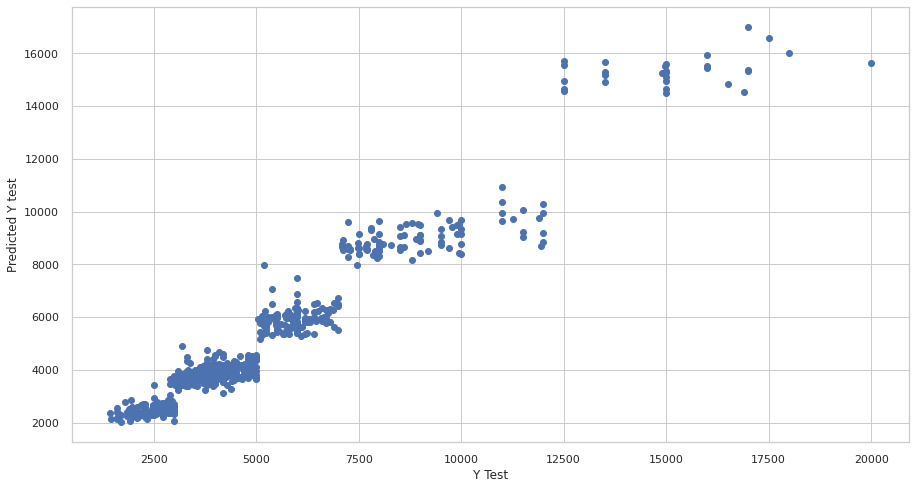

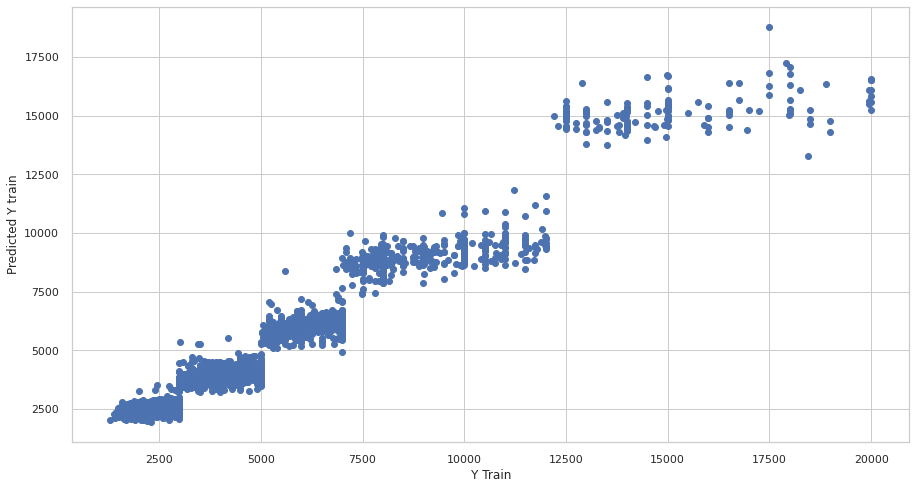

In [42]:
plt.figure(figsize=(15,8))
plt.scatter(Yp_test,p_rent_pred_lin_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y test')
plt.figure(figsize=(15,8))
plt.scatter(Yp_train,p_rent_pred_lin)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y train')
plt.show()

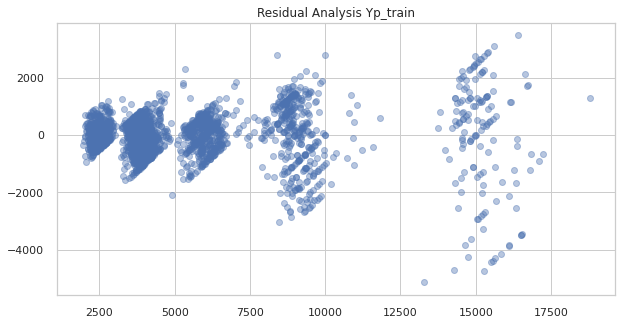

In [43]:
# run a residual analysis to assess the accuracy of our multiple linear regression model
residuals_train = p_rent_pred_lin - Yp_train
 
plt.scatter(p_rent_pred_lin, residuals_train, alpha=0.4)
plt.title('Residual Analysis Yp_train')
plt.rcParams["figure.figsize"] = [10, 5]
plt.show()


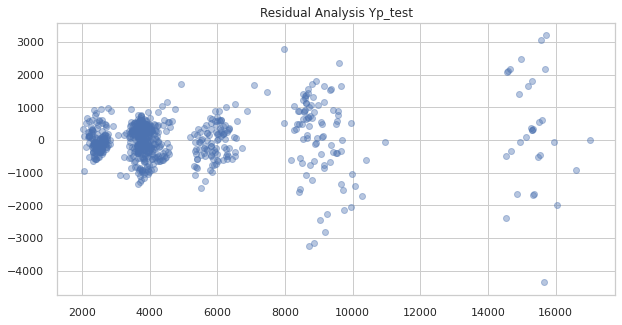

In [44]:
residuals_test = p_rent_pred_lin_test - Yp_test

plt.scatter(p_rent_pred_lin_test, residuals_test, alpha=0.4)
plt.title('Residual Analysis Yp_test')

plt.rcParams["figure.figsize"] = [10, 5]
plt.show()

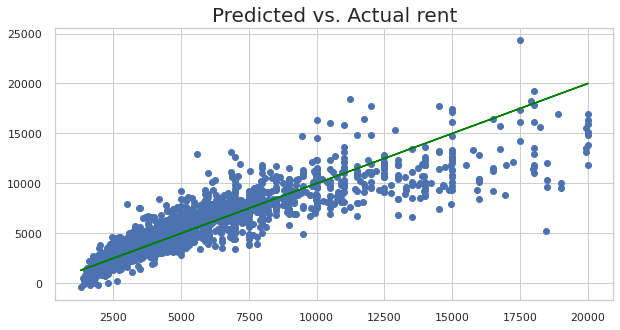

In [45]:
plt.scatter(Yp_train, rent_pred_lin)
plt.plot(Yp_train,Yp_train,  c='green')
plt.title('Predicted vs. Actual rent', size=20)

plt.show()

In [46]:
Yp_train['rent_pred_lin'] = model_lin_p.predict(Xp_train)
Yp_train['rent_pred_knn'] = model_knn_p.predict(Xp_train)
Yp_train['rent_pred_tree'] = model_tree_p.predict(Xp_train)
Yp_train.head()

,rent,rent_pred_lin,rent_pred_knn,rent_pred_tree
2172,3425,3813.639618,3773.333333,3592.257299
2219,5700,5997.042031,4100.000000,5879.011019
343,3800,3769.113354,3916.666667,3592.257299
1531,8657,9441.367370,11135.666667,9845.142857
262,3935,3829.099821,4045.000000,3921.066445


In [47]:
rmse = np.sqrt(mean_squared_error(Yp_train['rent'],
                                  Yp_train['rent_pred_lin']))
print("Linear RMSE = {:.4f}".format(rmse))
rmspe = np.sqrt(np.mean(np.square(((Yp_train['rent'] - Yp_train['rent_pred_lin']) / Yp_train['rent'])*100), axis=0))
print("Linear RMSPE = {:.4f}%".format(rmspe))

Linear RMSE = 765.8496
Linear RMSPE = 13.6588%


In [48]:
Yp_train['rent_pred_tree'] = model_tree_p.predict(Xp_train)
rmse_tree = np.sqrt(mean_squared_error(Yp_train['rent'],
                                  Yp_train['rent_pred_tree']))
print("Tree RMSE = {:.4f}".format(rmse_tree))
rmspe_tree = np.sqrt(np.mean(np.square(((Yp_train['rent'] - Yp_train['rent_pred_tree']) / Yp_train['rent'])*100), axis=0))
print("Tree RMSPE = {:.4f}%".format(rmspe_tree))

Tree RMSE = 701.0098
Tree RMSPE = 13.8462%


In [49]:
Yp_train['rent_pred_knn'] = model_knn_p.predict(Xp_train)
rmse_knn = np.sqrt(mean_squared_error(Yp_train['rent'],
                                  Yp_train['rent_pred_knn']))
print("KNN RMSE = {:.4f}".format(rmse_knn))
rmspe_knn = np.sqrt(np.mean(np.square(((Yp_train['rent'] - Yp_train['rent_pred_knn']) / Yp_train['rent'])*100), axis=0))
print("KNN RMSPE = {:.4f}%".format(rmspe_knn))

KNN RMSE = 1135.9765
KNN RMSPE = 20.4068%


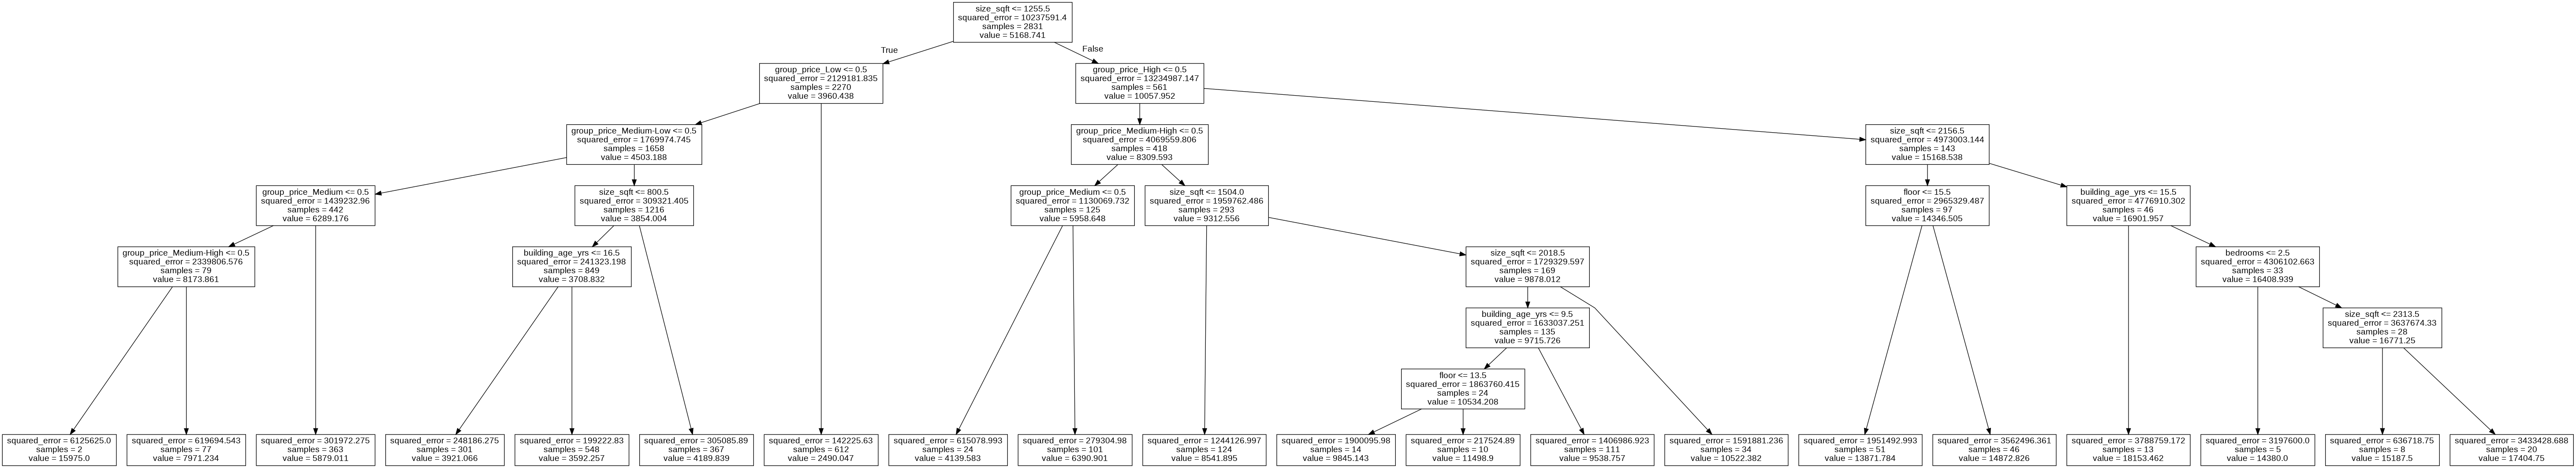

In [50]:
dot_data1 = export_graphviz(model_tree_p,  feature_names=x_p.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data1)[0]  
Image(graph.create_png(), width=2500)

In [51]:
manhattan_low = manhattan.loc[(manhattan['rent']<7000)]
manhattan_low.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough,Area
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan,Central Park
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan,Midtwon
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan,Village
5,10817,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,Manhattan,Upper Manhattan
6,9077,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,Midtown East,Manhattan,Midtwon


In [52]:
manhattan_low['group_price'] = np.select(
    [
        manhattan_low['rent'].between(0, 3000, inclusive=False), 
        manhattan_low['rent'].between(3000, 5000, inclusive=True),
        manhattan_low['rent'].between(5001, 7000, inclusive=True),
        manhattan_low['rent'].between(7001, 12000, inclusive=True),
        manhattan_low['rent'].between(12001, 50000, inclusive=True)
    ], 
    [
        'Low', 
        'Medium-Low',
        'Medium',
        'Medium-High',
        'High'
    ], 
    default='Unknown'
)
manhattan_low.head()
manhattan_lp_groups = manhattan_low.drop(['rental_id','neighborhood', 'borough'],axis=1, inplace=False)
manhattan_lp_groups =  pd.get_dummies(manhattan_lp_groups)
manhattan_lp_groups.head()
y_lp = manhattan_lp_groups[['rent']]

# 5 features plus areas
x_lp =manhattan_lp_groups[[
  'bedrooms',
  'bathrooms',
  'size_sqft',
  'floor',
  'building_age_yrs',
  # 'group_price_High'
  'group_price_Low',
  'group_price_Medium',
  'group_price_Medium-Low'
  # 'group_price_Medium-High'
]]
print(y_lp.shape)
print(x_lp.shape)

(2886, 1)
(2886, 8)


In [53]:
Xlp_train,Xlp_test ,Ylp_train,Ylp_test =  split(x_lp,y_lp,test_size=0.2,random_state=123456)
model_lin_lp = LinearRegression().fit(Xlp_train, Ylp_train)
model_tree_lp =  DecisionTreeRegressor(max_leaf_nodes=20)
model_tree_lp.fit(Xlp_train, Ylp_train)
model_knn_lp =  KNeighborsRegressor(n_neighbors=3).fit(Xlp_train,Ylp_train)

In [54]:
# train test split
manhattan_low_train, manhattan_low_test = split(manhattan_low, train_size=0.8, random_state=12456)

In [55]:
# predict for train and test 
lp_rent_pred_lin_test =  model_lin_lp.predict(Xlp_test) 
lp_rent_pred_lin =  model_lin_lp.predict(Xlp_train) 

In [56]:
Ylp_train['rent_pred_lin'] = model_lin_lp.predict(Xlp_train)
Ylp_train['rent_pred_knn'] = model_knn_lp.predict(Xlp_train)
Ylp_train['rent_pred_tree'] = model_tree_lp.predict(Xlp_train)
Ylp_train.head()

,rent,rent_pred_lin,rent_pred_knn,rent_pred_tree
1100,2999,2614.425743,3813.666667,2697.051887
37,3625,3885.617032,3623.333333,3911.400000
351,5500,5891.295212,4998.333333,5872.370968
2232,3800,3877.004956,3450.000000,3659.077449
1943,2600,2494.125528,2917.666667,2697.051887


In [57]:
Xlp_train,Xlp_test ,Ylp_train,Ylp_test =  split(x_lp,y_lp,test_size=0.2,random_state=123456)

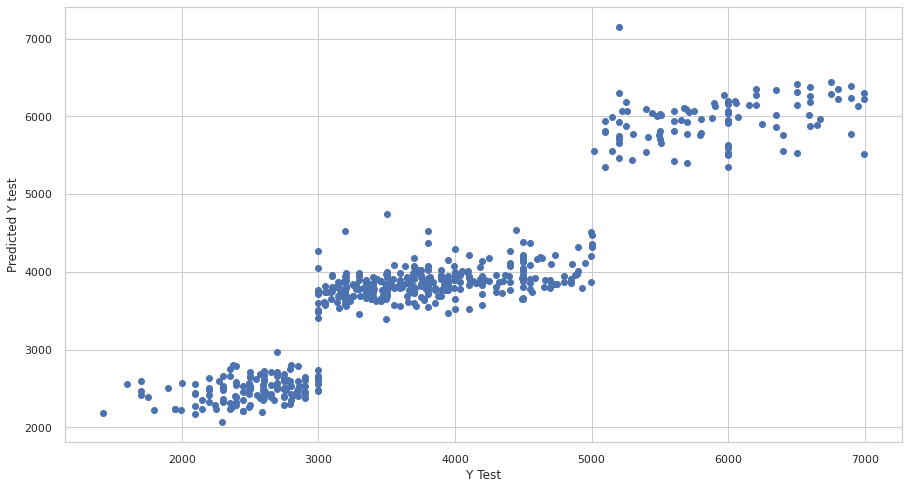

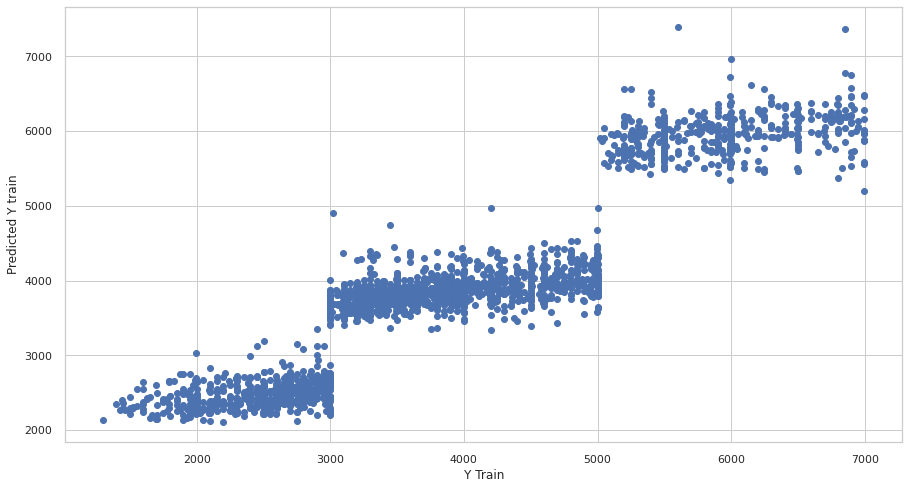

In [58]:
plt.figure(figsize=(15,8))
plt.scatter(Ylp_test,lp_rent_pred_lin_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y test')
plt.figure(figsize=(15,8))
plt.scatter(Ylp_train,lp_rent_pred_lin)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y train')
plt.show()

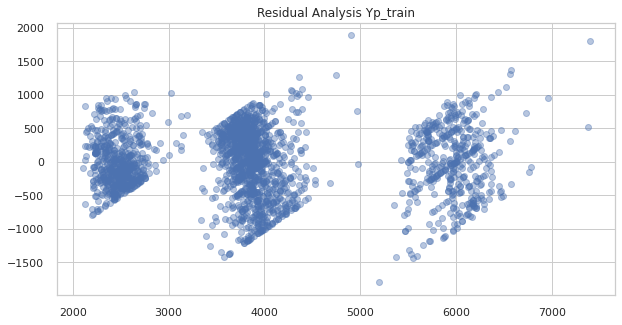

In [59]:
# run a residual analysis to assess the accuracy of our multiple linear regression model
residuals_train = lp_rent_pred_lin - Ylp_train
 
plt.scatter(lp_rent_pred_lin, residuals_train, alpha=0.4)
plt.title('Residual Analysis Yp_train')
plt.rcParams["figure.figsize"] = [10, 5]
plt.show()

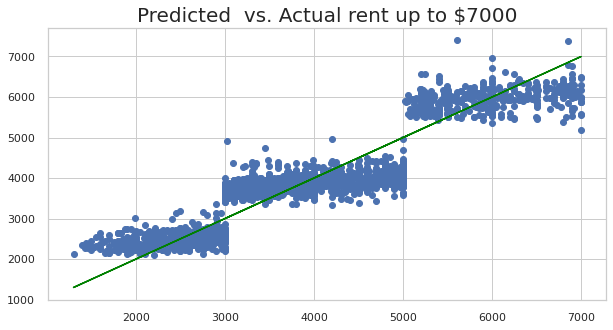

In [60]:
plt.scatter(Ylp_train, lp_rent_pred_lin)
plt.plot(Ylp_train,Ylp_train,  c='green')
plt.title('Predicted  vs. Actual rent up to $7000', size=20)

plt.show()

In [61]:
Ylp_train['rent_pred_lin'] = model_lin_lp.predict(Xlp_train)
Ylp_test['rent_pred_lin'] = model_lin_lp.predict(Xlp_test)

In [62]:
rmse = np.sqrt(mean_squared_error(Ylp_train['rent'],
                                  Ylp_train['rent_pred_lin']))
print("Linear RMSE = {:.4f}".format(rmse))
rmspe = np.sqrt(np.mean(np.square(((Ylp_train['rent'] - Ylp_train['rent_pred_lin']) / Ylp_train['rent'])*100), axis=0))
print("Linear RMSPE = {:.4f}%".format(rmspe))

Linear RMSE = 475.8236
Linear RMSPE = 13.8155%


In [63]:
Ylp_train['rent_pred_tree'] = model_tree_lp.predict(Xlp_train)
rmse_tree = np.sqrt(mean_squared_error(Ylp_train['rent'],
                                  Ylp_train['rent_pred_tree']))
print("Tree RMSE = {:.4f}".format(rmse_tree))
rmspe_tree = np.sqrt(np.mean(np.square(((Ylp_train['rent'] - Ylp_train['rent_pred_tree']) / Ylp_train['rent'])*100), axis=0))
print("Tree RMSPE = {:.4f}%".format(rmspe_tree))

Tree RMSE = 437.2698
Tree RMSPE = 12.8293%


In [64]:
Ylp_test['rent_pred_tree'] = model_tree_lp.predict(Xlp_test)
rmse_tree = np.sqrt(mean_squared_error(Ylp_test['rent'],
                                  Ylp_test['rent_pred_tree']))
print("Tree RMSE = {:.4f}".format(rmse_tree))
rmspe_tree = np.sqrt(np.mean(np.square(((Ylp_test['rent'] - Ylp_test['rent_pred_tree']) / Ylp_test['rent'])*100), axis=0))
print("Tree RMSPE = {:.4f}%".format(rmspe_tree))

Tree RMSE = 431.3968
Tree RMSPE = 12.2076%


In [65]:
Ylp_train['rent_pred_knn'] = model_knn_lp.predict(Xlp_train)
Ylp_test['rent_pred_knn'] = model_knn_lp.predict(Xlp_test)
rmse_knn = np.sqrt(mean_squared_error(Ylp_train['rent'],
                                  Ylp_train['rent_pred_knn']))
print("KNN RMSE = {:.4f}".format(rmse_knn))
rmspe_knn = np.sqrt(np.mean(np.square(((Ylp_train['rent'] - Ylp_train['rent_pred_knn']) / Ylp_train['rent'])*100), axis=0))
print("KNN RMSPE = {:.4f}%".format(rmspe_knn))

KNN RMSE = 565.7712
KNN RMSPE = 16.0430%


In [66]:
Ylp_train['rent_pred_knn'] = model_knn_lp.predict(Xlp_train)

In [67]:
def normalization(df):
  df = (df-df.min())/(df.max()-df.min())
  return df

# manhattan_norm1 =manhattan_norm.apply(normalization(manhattan_norm.loc[:, manhattan_norm.columns!='rent']))
manhattan_norm = manhattan_lp_groups
manhattan_norm = ((manhattan_norm.loc[:, manhattan_norm.columns!='rent'])-manhattan_norm.loc[:, manhattan_norm.columns!='rent'].min())/(manhattan_norm.loc[:, manhattan_norm.columns!='rent'].max()-(manhattan_norm.loc[:, manhattan_norm.columns!='rent']).min())
manhattan_norm['rent']=manhattan['rent']
manhattan_norm.head()
manhattan_columns_union = manhattan_norm
manhattan_columns_union['room_bath_size'] = (manhattan_columns_union['bedrooms']**0.5)*(manhattan_norm['bathrooms']**0.5)*(manhattan_norm['size_sqft']**0.5)
manhattan_columns_union.head()

def value_0 (col):
  for x in col:
    if x == 0 : 
      x+= 0.001
  return x    

manhattan_columns_union.apply(value_0(manhattan_columns_union),axis=1)  
manhattan_columns_union.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,...,Area_Midtwon,Area_Queens,Area_Roosevelt Island,Area_Upper Manhattan,Area_Village,group_price_Low,group_price_Medium,group_price_Medium-Low,rent,room_bath_size
0,0.0,0.333333,0.083636,0.209302,0.024691,0.094444,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2550,0.000000
2,0.2,0.333333,0.242182,0.046512,0.629630,0.161111,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4500,0.127065
3,0.2,0.333333,0.263636,0.069767,0.098765,0.172222,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4795,0.132574
5,0.6,0.666667,0.309091,0.069767,0.061728,0.561111,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3800,0.351620
6,0.0,0.000000,0.127273,0.139535,0.012346,0.638889,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995,0.000000


In [68]:
X_u =  manhattan_norm[['room_bath_size']]
Y_u = manhattan_norm[['rent']]
# X_u = X_u.values.reshape((-1, 1))
print(Y_u.shape)
print(X_u.shape)

(2886, 1)
(2886, 1)


In [69]:
Xu_train,Xu_test ,Yu_train,Yu_test=  split(X_u,Y_u,test_size=0.2,random_state=123456)
model_lin = LinearRegression().fit(Xu_train, Yu_train)
u_model_lin = model_lin.predict(Xu_train)

print(Yu_train.shape)
print(Xu_train.head())

(2308, 1)
      room_bath_size
1100        0.000000
37          0.098473
351         0.182109
2232        0.096358
1943        0.000000


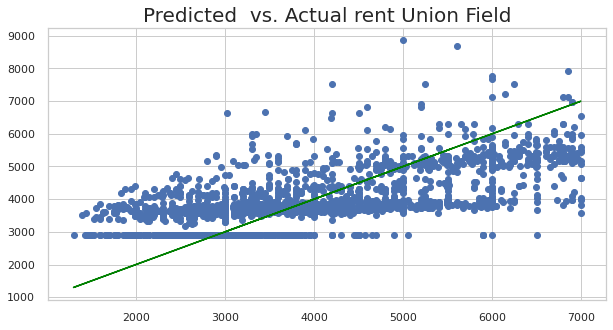

In [70]:
plt.scatter(Yu_train, u_model_lin)
plt.plot(Yu_train,Yu_train,  c='green')
plt.title('Predicted  vs. Actual rent Union Field', size=20)

plt.show()

In [71]:
Yu_train['rent_pred_lin'] = model_lin.predict(Xu_train)
Yu_train.head()


,rent,rent_pred_lin
1100,2999,2906.012997
37,3625,3686.643500
351,5500,4349.651878
2232,3800,3669.875002
1943,2600,2906.012997


In [72]:
rmse = np.sqrt(mean_squared_error(Yu_train['rent'],
                                  Yu_train['rent_pred_lin']))
print("Linear RMSE = {:.4f}".format(rmse))
rmspe = np.sqrt(np.mean(np.square(((Yu_train['rent'] - Yu_train['rent_pred_lin']) / Yu_train['rent'])*100), axis=0))
print("Linear RMSPE = {:.4f}%".format(rmspe))

Linear RMSE = 963.3529
Linear RMSPE = 30.6323%


In [73]:
rmse_results = pd.DataFrame({
    'area_linear':[1440.1598],
    'area_tree':[1509.2319],
    'area_knn':[1136.9769],
    'price_linear':[765.8496],
    'price_tree':[701.0098],
    'price_knn':[1135.9765],
    'lowp_linear':[475.8236],
    'lowp_tree':[437.2698],
    'lowp_knn':[565.7712],
    'union_linear':[963.3529]
})
rmse_results

,area_linear,area_tree,area_knn,price_linear,price_tree,price_knn,lowp_linear,lowp_tree,lowp_knn,union_linear
0,1440.1598,1509.2319,1136.9769,765.8496,701.0098,1135.9765,475.8236,437.2698,565.7712,963.3529


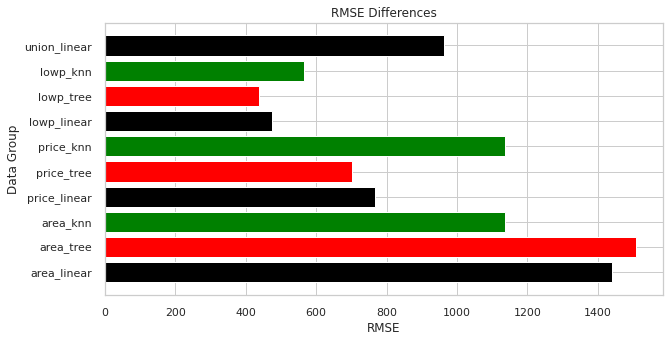

In [74]:
rmse_names = ['area_linear','area_tree','area_knn','price_linear','price_tree','price_knn','lowp_linear','lowp_tree','lowp_knn','union_linear']
rmse_value = [1440.1598,1509.2319,1136.9769,765.8496,701.0098,1135.9765,475.8236,437.2698,565.7712,963.3529]
plt.barh(rmse_names,rmse_value,color=['black', 'red', 'green'])
plt.title('RMSE Differences')
plt.ylabel('Data Group')
plt.xlabel('RMSE')
plt.show()

In [75]:
def tree_calc(max_depth, Xlp_train, Ylp_train, Xlp_test, Ylp_test):
  rt=DecisionTreeRegressor(max_depth=max_depth,random_state=42)
  rt.fit(Xlp_train, Ylp_train)
  y_train_rt_prediction=rt.predict(Xlp_train)
  
  mse_rt_train=mean_squared_error(Ylp_train, y_train_rt_prediction)
  RMSE_rt_train=mse_rt_train**0.5
  r2_rt_train=rt.score(Xlp_train, Ylp_train)

  y_test_rt_prediction=rt.predict(Xlp_test)
  mse_rt_test=mean_squared_error(Ylp_test, y_test_rt_prediction)
  RMSE_rt_test=mse_rt_test**0.5
  r2_rt_test=rt.score(Xlp_test, Ylp_test)

  return RMSE_rt_train, RMSE_rt_test, r2_rt_train, r2_rt_test

In [76]:
Ylp_train.shape

(2308, 4)

In [77]:
# Try different trees with max depth from 1 to 50
max_i=50
r2_rt_train_scores =[]
r2_rt_test_scores = []
RMSE_tn_scores =[]
RMSE_tt_scores = []
max_depth = []
for i in range(1,max_i):
  RMSE_tn, RMSE_tt, R2_tn, R2_tt=tree_calc(i, Xlp_train, Ylp_train, Xlp_test, Ylp_test)
  RMSE_tn_scores.append(RMSE_tn)
  RMSE_tt_scores.append(RMSE_tt)
  r2_rt_train_scores.append(R2_tn)
  r2_rt_test_scores.append(R2_tt)
  max_depth.append(i)

In [78]:
# Fitting best tree
model = DecisionTreeRegressor(max_depth=8)
model.fit(Xlp_train, Ylp_train)
y_train_prediction = model.predict(Xlp_train)
train_rmse = np.sqrt(mean_squared_error(Ylp_train, y_train_prediction))
y_test_prediction = model.predict(Xlp_test)
test_rmse = np.sqrt(mean_squared_error(Ylp_test, y_test_prediction))

r2_train=r2_score(Ylp_train, y_train_prediction)
r2_test=r2_score(Ylp_test, y_test_prediction)
print('RMSE Scores:',train_rmse,test_rmse)
print('R2 Scores:',r2_train,r2_test )

RMSE Scores: 252.52587883846886 339.6145120962747
R2 Scores: 0.9566446796289971 0.9109189942686756


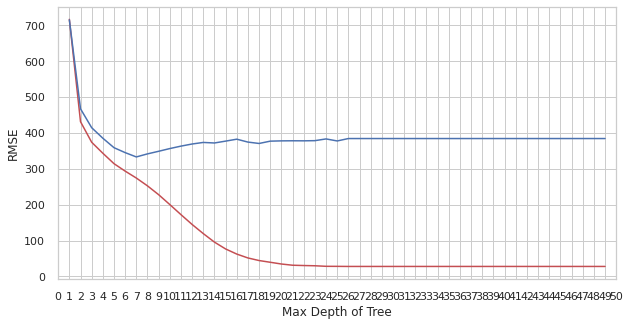

Optimal RMSE score is 333.2577335069611 when max depth of tree = 7


In [79]:
# Plot RMSE Scores
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (35,15)
plt.plot(max_depth, RMSE_tn_scores, 'r', label='Training')
plt.plot(max_depth, RMSE_tt_scores, 'b', label='Testing')
plt.xlabel('Max Depth of Tree')
plt.ylabel('RMSE')
plt.locator_params(axis='x', nbins=50)
plt.xlim([0, max_i])
plt.show()
print("Optimal RMSE score is {} when max depth of tree = {}".format(np.min(RMSE_tt_scores),1+RMSE_tt_scores.index(np.min(RMSE_tt_scores))))

########################################################################################

In [80]:
def evaluation(y, predictions):
    # mae = mean_absolute_error(Ylp_train, predictions)
    # mse = mean_squared_error(Ylp_train, predictions)
    rmse = np.sqrt(mean_squared_error(Ylp_train, predictions))
    r_squared = r2_score(Ylp_train, predictions)
    return rmse, r_squared

In [90]:
lasso = Lasso(alpha=0.001, normalize=True)
lasso.fit(Xlp_train, Ylp_train)
predictions = lasso.predict(Xlp_train)
lasso_coef = lasso.coef_
y_predicted = lasso.predict(Xlp_test)
rmse, r_squared = evaluation(Ylp_train, predictions)
print("RMSE lasso:", rmse)
print("R2 Score lasso:", r_squared)
print(lasso_coef)

RMSE lasso: 344.0222565110386
R2 Score lasso: 0.9187039440739104
[[ 3.26069442e+01  1.37401673e+02  8.15434523e-01  6.09613067e+00
  -2.23783944e+00 -1.32105982e+03  1.47063168e+03 -2.05620276e+02]
 [ 3.26776549e+01  1.37515771e+02  8.15184107e-01  6.09652478e+00
  -2.23783117e+00 -1.40612165e+03  1.38554751e+03 -2.90682187e+02]
 [ 2.65857122e+01  9.94361791e+01  8.06749332e-01  3.68783269e+00
  -2.17410119e+00 -1.34883811e+03  1.49940482e+03 -2.11700435e+02]
 [ 6.46053889e+01  1.21000620e+02  1.81577031e+00  1.09479325e+01
  -4.81816365e+00 -6.36154749e+02  8.07324442e+02 -6.54544181e+01]]


In [ ]:
alphas = np.linspace(0.001,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xlp_train, Ylp_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

In [ ]:
ridge = Ridge(alpha=0.001, normalize=True)
ridge.fit(Xlp_train,Ylp_train)

  # predict 
y_pred_ridge = ridge.predict(Xlp_train)

  #evaluate 
rmse_ridge = mean_squared_error(Ylp_train, y_pred_ridge)
r_squared_ridge = r2_score(Ylp_train, y_pred_ridge)
  # print results 

print("RMSE ridge:", rmse_ridge)
print("R2 Score ridge:", r_squared_ridge)


In [ ]:
Xlp_train,Xlp_test ,Ylp_train,Ylp_test =  split(x_lp,y_lp,test_size=0.2,random_state=123456)


In [ ]:
fig=plt.figure()

ax.scatter(x= Xlp_train, y= Ylp_train  , color='r')
ax.scatter(x= Xlp_test, y= y_predicted, color='b')
plt.show()

####################################################################

In [84]:
#Evgenia's test linear regression w/o grouping by price only up to 7000$

In [85]:
manhattan = pd.read_csv("manhattan.csv")

manhattan =manhattan.drop(['rental_id','neighborhood', 'borough'],axis=1, inplace=False)
manhattan=manhattan.loc[(manhattan['rent']<7000)]
manhattan.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
5,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0
6,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0


In [86]:
X = manhattan.drop('rent', axis=1)
y = manhattan['rent']

rent_reg = LinearRegression().fit(X, y)
manhattan['rent_predict'] = rent_reg.predict(X)
manhattan.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,rent_predict
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,3068.833427
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,5085.007210
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,4378.896695
5,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,4792.211187
6,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,2126.832835


In [87]:
# Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=12345)
rent_reg = LinearRegression().fit(X, y)
y_predict = rent_reg.predict(X_train)
rmse = np.sqrt(mean_squared_error(manhattan['rent_predict'],
                   manhattan['rent']))
print("RMSE = {:.2f}".format(rmse))

RMSE = 781.73
